# Unsupervised-Model-for-Plant Allocation

In [21]:
# Initial imports
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


### Deliverable 1: Preprocessing the Data for PCA

In [26]:
# Load the Plant_DBcopy.csv dataset.
#file_path = "Resources/Plant_DBcopy.csv"
file_path = "Resources/Base_limpia_definitiva_cleaningCOPY.csv"
plants_df = pd.read_csv(file_path, encoding='latin-1', skiprows=1, error_bad_lines=False, lineterminator='\n', fileEncoding="UTF-8-BOM")
plants_df

TypeError: read_csv() got an unexpected keyword argument 'fileEncoding'

In [25]:
# Create a new DataFrame that holds clase names.
plants_df_name = plants_df.filter(['clase'], axis=1)
plants_df_name.head()

""
0
1
2
3
4


In [4]:
plants_df

,División,clase,orden,familia,Hierba,Color,longitud,latitud,tipovegetacionmapa,altitudmapa
0,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-110.433889,27.783333,Vegetacion Halofila,9
1,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-110.996667,28.111667,Matorral Sarcocaule,79
2,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-99.325000,24.441667,Matorral Submontano,271
3,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-99.325000,24.441667,Matorral Submontano,271
4,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-106.000000,28.500000,Pastizal Natural,1572
...,...,...,...,...,...,...,...,...,...,...
1186,Magnoliophyta,Magnoliopsida,Sapindales,Simaroubaceae,Hierba,Naranja,-100.850000,23.950000,Vegetacion Halofila,1741
1187,Magnoliophyta,Magnoliopsida,Sapindales,Simaroubaceae,Hierba,Naranja,-100.983333,23.466667,Matorral Desertico Microfilo,1913
1188,Magnoliophyta,Magnoliopsida,Violales,Bixaceae,Hierba,Naranja,-110.808610,30.470280,Pastizal Natural,1049
1189,Magnoliophyta,Magnoliopsida,Violales,Bixaceae,Hierba,Naranja,-105.830000,28.580000,Pastizal Natural,1649


In [5]:
# Remove rows that have at least 1 null value.
plants_df = plants_df.dropna(how='any',axis=0) 
plants_df

,División,clase,orden,familia,Hierba,Color,longitud,latitud,tipovegetacionmapa,altitudmapa
0,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-110.433889,27.783333,Vegetacion Halofila,9
1,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-110.996667,28.111667,Matorral Sarcocaule,79
2,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-99.325000,24.441667,Matorral Submontano,271
3,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-99.325000,24.441667,Matorral Submontano,271
4,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-106.000000,28.500000,Pastizal Natural,1572
...,...,...,...,...,...,...,...,...,...,...
1186,Magnoliophyta,Magnoliopsida,Sapindales,Simaroubaceae,Hierba,Naranja,-100.850000,23.950000,Vegetacion Halofila,1741
1187,Magnoliophyta,Magnoliopsida,Sapindales,Simaroubaceae,Hierba,Naranja,-100.983333,23.466667,Matorral Desertico Microfilo,1913
1188,Magnoliophyta,Magnoliopsida,Violales,Bixaceae,Hierba,Naranja,-110.808610,30.470280,Pastizal Natural,1049
1189,Magnoliophyta,Magnoliopsida,Violales,Bixaceae,Hierba,Naranja,-105.830000,28.580000,Pastizal Natural,1649


In [6]:
# Remove the "altitudmapa" column. 
# Keep all the Plants that are being traded.
indexNames = plants_df[(plants_df["altitudmapa"] == 'False')].index
plants_df.drop(indexNames, inplace = True)
plants_df.head()

/Users/marioacosta/opt/anaconda3/envs/PythonData/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,División,clase,orden,familia,Hierba,Color,longitud,latitud,tipovegetacionmapa,altitudmapa
0,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-110.433889,27.783333,Vegetacion Halofila,9
1,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-110.996667,28.111667,Matorral Sarcocaule,79
2,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-99.325000,24.441667,Matorral Submontano,271
3,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-99.325000,24.441667,Matorral Submontano,271
4,Magnoliophyta,Liliopsida,Alismatales,Alismataceae,Hierba,Blanca,-106.000000,28.500000,Pastizal Natural,1572


In [7]:
plants_df.drop("familia", axis = 1, inplace = True)
plants_df.head()

/Users/marioacosta/opt/anaconda3/envs/PythonData/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,División,clase,orden,Hierba,Color,longitud,latitud,tipovegetacionmapa,altitudmapa
0,Magnoliophyta,Liliopsida,Alismatales,Hierba,Blanca,-110.433889,27.783333,Vegetacion Halofila,9
1,Magnoliophyta,Liliopsida,Alismatales,Hierba,Blanca,-110.996667,28.111667,Matorral Sarcocaule,79
2,Magnoliophyta,Liliopsida,Alismatales,Hierba,Blanca,-99.325000,24.441667,Matorral Submontano,271
3,Magnoliophyta,Liliopsida,Alismatales,Hierba,Blanca,-99.325000,24.441667,Matorral Submontano,271
4,Magnoliophyta,Liliopsida,Alismatales,Hierba,Blanca,-106.000000,28.500000,Pastizal Natural,1572


In [8]:
plants_df.drop("División", axis = 1, inplace = True)
plants_df.head()

/Users/marioacosta/opt/anaconda3/envs/PythonData/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,clase,orden,Hierba,Color,longitud,latitud,tipovegetacionmapa,altitudmapa
0,Liliopsida,Alismatales,Hierba,Blanca,-110.433889,27.783333,Vegetacion Halofila,9
1,Liliopsida,Alismatales,Hierba,Blanca,-110.996667,28.111667,Matorral Sarcocaule,79
2,Liliopsida,Alismatales,Hierba,Blanca,-99.325000,24.441667,Matorral Submontano,271
3,Liliopsida,Alismatales,Hierba,Blanca,-99.325000,24.441667,Matorral Submontano,271
4,Liliopsida,Alismatales,Hierba,Blanca,-106.000000,28.500000,Pastizal Natural,1572


In [9]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(plants_df, columns=["clase", "orden", "Hierba", "Color", "tipovegetacionmapa"])
X

,longitud,latitud,altitudmapa,clase_Liliopsida,clase_Lycopodiopsida,clase_Magnoliopsida,orden_Alismatales,orden_Apiales,orden_Arales,orden_Arecales,...,tipovegetacionmapa_No aplica,tipovegetacionmapa_Pastizal Gipsofilo,tipovegetacionmapa_Pastizal Halofilo,tipovegetacionmapa_Pastizal Natural,tipovegetacionmapa_Selva Baja Caducifolia,tipovegetacionmapa_Selva Baja Espinosa,tipovegetacionmapa_Vegetacion Halofila,tipovegetacionmapa_Vegetacion de Desiertos Arenosos,tipovegetacionmapa_Vegetacion de Dunas Costeras,tipovegetacionmapa_Vegetacion de Galeria
0,-110.433889,27.783333,9,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-110.996667,28.111667,79,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-99.325000,24.441667,271,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-99.325000,24.441667,271,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-106.000000,28.500000,1572,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,-100.850000,23.950000,1741,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1187,-100.983333,23.466667,1913,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188,-110.808610,30.470280,1049,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1189,-105.830000,28.580000,1649,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
# Standardize the data with StandardScaler().
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

[[-7.27356560e-01  4.48520622e-01 -1.45766167e+00 ... -8.72963943e-02
  -2.90007395e-02 -5.80747904e-02]
 [-8.16259356e-01  5.37623783e-01 -1.35609572e+00 ... -8.72963943e-02
  -2.90007395e-02 -5.80747904e-02]
 [ 1.02752955e+00 -4.58339476e-01 -1.07751481e+00 ... -8.72963943e-02
  -2.90007395e-02 -5.80747904e-02]
 ...
 [-7.86551740e-01  1.17770332e+00  5.13182414e-02 ... -8.72963943e-02
  -2.90007395e-02 -5.80747904e-02]
 [-7.40339998e-05  6.64719822e-01  9.21883576e-01 ... -8.72963943e-02
  -2.90007395e-02 -5.80747904e-02]
 [ 2.14766992e-01 -3.33957234e-01  8.34827042e-01 ... -8.72963943e-02
  -2.90007395e-02 -5.80747904e-02]]


In [11]:
#pd.plotting.scatter_matrix(X, alpha=0.2, figsize=(30,10))

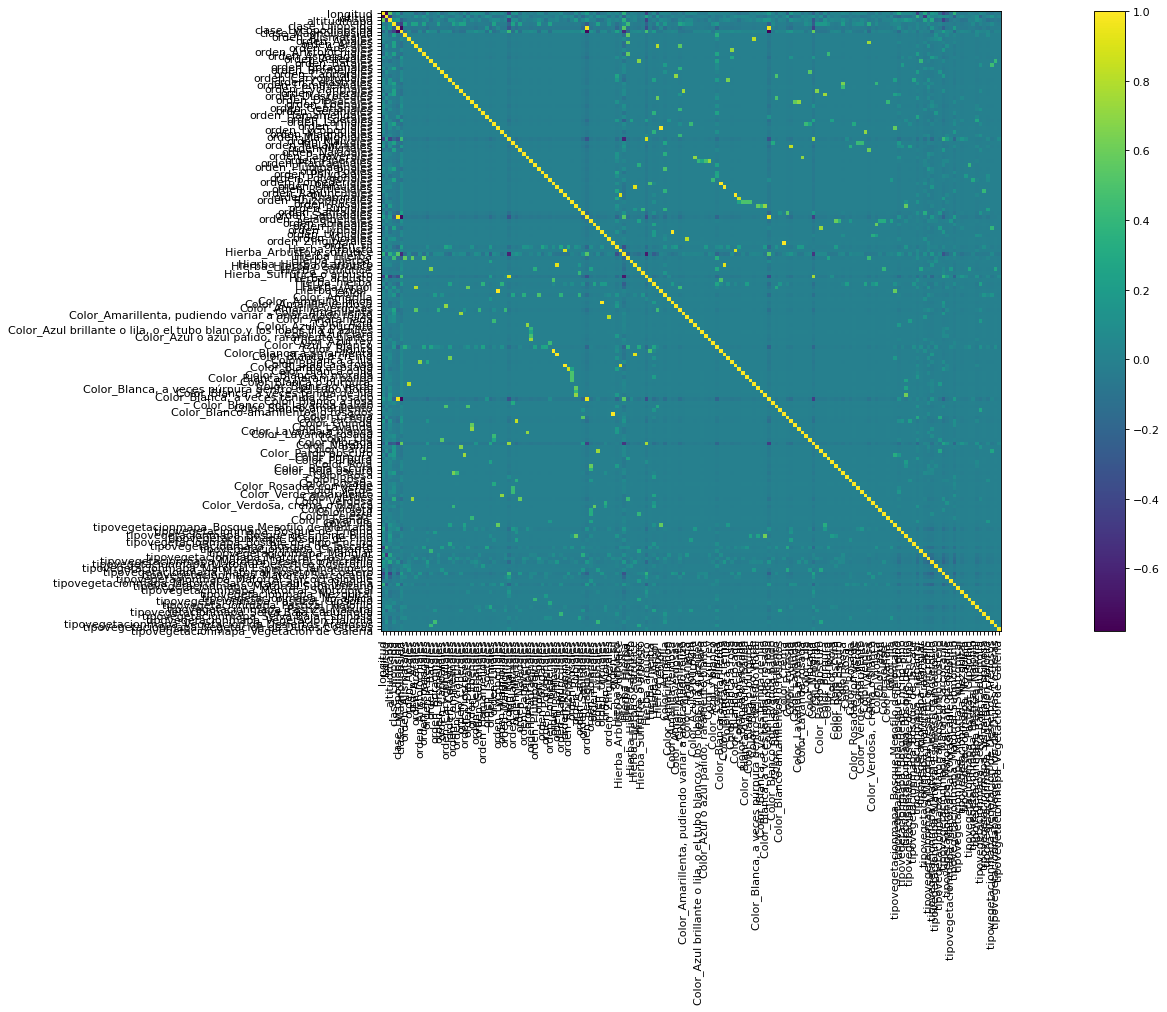

In [12]:
corr = X.corr()
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.show()

### Deliverable 2: Reducing Data Dimensions Using PCA

In [13]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=4)
#X_pca = pca.fit_transform(X_scaled)
X_pca = pca.fit_transform(X)
X_pca

### Check why we are using three principal components ###

array([[-1.00464224e+03, -1.00583937e+00, -4.51486653e-01,
         2.74052783e-01],
       [-9.34647425e+02,  6.01351782e-02, -5.06509523e-01,
         2.35482331e-01],
       [-7.42580022e+02, -1.08850903e+01,  1.62540741e+00,
        -2.77081981e-01],
       ...,
       [ 3.53311090e+01,  6.62642388e+00,  1.47248286e+00,
        -7.24988953e-01],
       [ 6.35351709e+02,  4.84138660e+00,  1.93172512e+00,
        -1.09626310e+00],
       [ 5.75369168e+02,  1.58997971e+00, -6.41890261e-01,
        -7.72084847e-01]])

In [14]:
# Create a DataFrame with the three principal components.
pcs_df=pd.DataFrame(
data=X_pca, columns=["PC 1", "PC 2","PC 3", "PC 4"], index = plants_df.index)
pcs_df.head(10)

,PC 1,PC 2,PC 3,PC 4
0,-1004.642236,-1.005839,-0.451487,0.274053
1,-934.647425,0.060135,-0.506510,0.235482
2,-742.580022,-10.885090,1.625407,-0.277082
3,-742.580022,-10.885090,1.625407,-0.277082
4,558.352452,4.514055,1.821742,-0.665425
5,558.352452,4.514055,1.821742,-0.665425
6,-981.633126,-2.522129,-0.993132,0.309711
7,-981.633126,-2.522129,-0.993132,0.309711
8,-754.581125,-10.710021,2.285526,-0.361131
9,-1003.567591,-13.728426,2.478813,-0.406386


In [15]:
#pca.explained_variance_ratio_.cumsum()
pca.explained_variance_ratio_

array([9.99913552e-01, 7.01709668e-05, 9.31428217e-06, 1.93655021e-06])

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

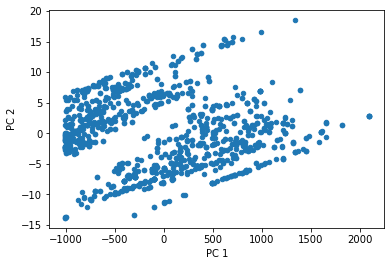

In [16]:
pcs_df.plot(kind = 'scatter', x = "PC 1", y = "PC 2")

### Deliverable 3: Clustering Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [17]:
# Create an elbow curve to find the best value for K.
inertia = []
#k = list(range(1, 11))
k = list(range(1, 11))
for i in k:
   km = KMeans(n_clusters=i, random_state=0)
   km.fit(pcs_df)
   inertia.append(km.inertia_)

### Check why the range is from 1 to 11 ###

In [18]:
# CREATE A DATAFRAME AND PLOT THE WLBOW CURVE

elbow_data = {"k":k, "inertia":inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [19]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

predictions

array([2, 2, 2, ..., 0, 1, 1], dtype=int32)

In [20]:
# Create a new DataFrame including predicted clusters and Plant Allocation features.
# Concatentate the clustered_df and pcs_df plants_df on the same columns.
clustered_df = pd.concat([plants_df, pcs_df], axis=1)


#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the Plant Names. 
clustered_df['PlantsName'] = plants_df_name 

### The name is not important for clustering, that is why we add it at the end of the process ###


#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class'] = predictions


# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(1190, 14)


,clase,orden,Hierba,Color,longitud,latitud,tipovegetacionmapa,altitudmapa,PC 1,PC 2,PC 3,PC 4,PlantsName,Class
0,Liliopsida,Alismatales,Hierba,Blanca,-110.433889,27.783333,Vegetacion Halofila,9,-1004.642236,-1.005839,-0.451487,0.274053,Liliopsida,2
1,Liliopsida,Alismatales,Hierba,Blanca,-110.996667,28.111667,Matorral Sarcocaule,79,-934.647425,0.060135,-0.506510,0.235482,Liliopsida,2
2,Liliopsida,Alismatales,Hierba,Blanca,-99.325000,24.441667,Matorral Submontano,271,-742.580022,-10.885090,1.625407,-0.277082,Liliopsida,2
3,Liliopsida,Alismatales,Hierba,Blanca,-99.325000,24.441667,Matorral Submontano,271,-742.580022,-10.885090,1.625407,-0.277082,Liliopsida,2
4,Liliopsida,Alismatales,Hierba,Blanca,-106.000000,28.500000,Pastizal Natural,1572,558.352452,4.514055,1.821742,-0.665425,Liliopsida,1
5,Liliopsida,Alismatales,Hierba,Blanca,-106.000000,28.500000,Pastizal Natural,1572,558.352452,4.514055,1.821742,-0.665425,Liliopsida,1
6,Liliopsida,Alismatales,Hierba,Blanca,-109.208333,26.551389,Matorral Sarcocrasicaule,32,-981.633126,-2.522129,-0.993132,0.309711,Liliopsida,2
7,Liliopsida,Alismatales,Hierba,Blanca,-109.208333,26.551389,Matorral Sarcocrasicaule,32,-981.633126,-2.522129,-0.993132,0.309711,Liliopsida,2
8,Liliopsida,Alismatales,Hierba,Blanca,-99.233333,25.146667,Matorral Submontano,259,-754.581125,-10.710021,2.285526,-0.361131,Liliopsida,2
9,Liliopsida,Alismatales,Hierba,Blanca,-97.750000,24.547222,Matorral Espinoso Tamaulipeco,10,-1003.567591,-13.728426,2.478813,-0.406386,Liliopsida,2


### Deliverable 4: Visualizing Plant Names Results

#### 3D-Scatter with Clusters

In [21]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
    width=800,
    hover_name="familia",
    hover_data=['Hierba'],
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

ValueError: Value of 'hover_name' is not the name of a column in 'data_frame'. Expected one of ['clase', 'orden', 'Hierba', 'Color', 'longitud', 'latitud', 'tipovegetacionmapa', 'altitudmapa', 'PC 1', 'PC 2', 'PC 3', 'PC 4', 'PlantsName', 'Class'] but received: familia

In [ ]:
# Create a table with the Plant Allocation.
clustered_df.hvplot.table(sortable=True, selectable=True)

In [ ]:
# Print the total number of Plant Allocation.
index = clustered_df.index
len(index)
print(str(len(index)))